## <p style="background-color:skyblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"> Employee Retention Prediction </p>

![image.png](istockphoto-1467351619-612x612.jpg)

<a id="problem"></a>
# <h2 style="background-color:lightgreen; font-family:Arial; color:black; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Problem</h2>
 # <p style="background-color:lightgreen; font-family:Arial; color:black; font-size:70%; text-align:center; border-radius:15px 50px; visibility:visible;">Develop comprehensive machine learning models to accurately predict whether an employee is likely to change jobs. By utilizing these models, the organization aims to enhance talent retention strategies, optimize recruitment processes, and improve overall workforce management. This approach will enable the company to proactively address employee needs, reduce turnover, and maintain a competitive edge in the industry.</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="objective"></a>
# <h2 style="background-color:lightgreen; font-family:Arial; color:black; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Objective</h2>
 # <p style="background-color:lightgreen; font-family:Arial; color:black; font-size:70%; text-align:center; border-radius:15px 50px; visibility:visible;">This project aims to develop a machine learning model to predict whether employees are likely to seek job changes, aiding in talent retention and recruitment planning. It should help in optimizing retention strategies, proactive recruitment, and better resource allocation using a predictive model, comprehensive data visualizations, and a comparative analysis of various machine learning algorithms.</p>

⬆️ [Table of Contents](#contents_tabel)

# Table of Contents
<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; color: white; font-size:115%; text-align:left">

1. [Problem](#problem)
2. [Objective](#objective)
3. [Step 1 | Import Libraries](#import)
4. [Step 2 | Read dfset](#read)
5. [Step 3 | dfset Overview](#overview)
6. [Step 4 | EDA](#eda)
   - [Step 4.1 | Univariate Analysis](#univariate)
   - [Step 4.2 |Categorical Variables Univariate Analysis](#categorical)
   - [Step 4.3 | Bivariate Analysis](#bivariate)
7. [Step 5 | df Preprocessing](#preprocessing)
   - [Step 5.1 | Missing Value Treatment](#missingvalue)
   - [Step 5.2 | Outlier Treatment](#outlier)
8. [df Spliting](#dfspliting)
9. [Step 6 | Decision Tree Model Building](#decisiontree)
   - [DT Hyperparameter Tuning](#dthyperparameter)
10. [Step 7 | Random Forest Model Building](#random)
    - [RF Hyperparameter Tuning](#rfhyperparameter)
11. [Step 8 | Logistic Regression Model Building](#logistic)
    - [Logistic Regression Hyperparameter Tuning](#logistictuning)
12. [Step 9 | Model Evaluation & Conclusion](#mandc)
13. [Step 10 | Conclusion](#conclusion)

<a id="import"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Summary:</font></h3>
Subplots: Used to display multiple visualizations in a single figure.
Histplot: Visualizes the distribution of a numerical variable.
Countplot: Used for categorical variables to show counts of each category.
Boxplot: Shows the distribution of a numerical variable across different categories.
Violin Plot: Combines a box plot and KDE, showing distribution and density.
Pairplot: Displays relationships between multiple variables in a grid of plots.
Heatmap: Visualizes correlations between features, helping to identify strong relationships.
These visualizations provide a comprehensive understanding of the df, relationships between features, and potential areas of interest for further analysis.



In [208]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline 

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 


import warnings
warnings.filterwarnings("ignore")

<a id="read"></a>
# <p style="background-color:lightgreen ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read dfset</p>

⬆️ [Table of Contents](#contents_tabel)

In [209]:
import pandas as pd

file_path = ("C:\\Users\\DINKAL\\Desktop\\BIA\\CapstonePreoject-ERP\\aug_train.csv")
df = pd.read_csv(file_path)
print(df.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [210]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


<div style="border-radius:10px; padding: 15px; background-color: black; font-size:120%; text-align:left; color: white;">

<h2 align="left"><font color="teal">Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
| :--- | :--- |      
| __enrollee_id__ | Unique identifier for each enrollee |
| __city__ | Code representing the city where the enrollee is located |
| __city_development_index__ | Development index of the city (0 = least developed, 1 = most developed) |
| __gender__ | Gender of the enrollee (Male/Female/Other) |
| __relevent_experience__ | Indicates if the enrollee has relevant experience (Yes/No) |
| __enrolled_university__ | Enrollment status in university courses (no_enrollment, part_time, full_time) |
| __education_level__ | Education level of the enrollee (High School/Graduate/Post-Graduate) |
| __major_discipline__ | The primary field of study (STEM, Humanities, etc.) |
| __experience__ | Number of years of experience |
| __company_size__ | Size of the company where the enrollee last worked |
| __company_type__ | Type of the company where the enrollee last worked (Pvt Ltd, Govt, etc.) |
| __last_new_job__ | Years since the last job change |
| __training_hours__ | Number of training hours completed |
| __target__ | Indicates whether the enrollee is looking for a new job (1 = Yes, 0 = No) |

</div>


<a id="overview"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)

Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:green'>|</span><span style='color:lightgreen'> Dataset Basic Information</span></b>

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me


<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:115%; text-align:left">

<h2 align="left"><font color=black>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __N__ entries, ranging from index 0 to N-1 (replace `N` with the actual number of entries).
    
    
* __Columns__: There are __C__ columns in the dataset corresponding to various attributes of the employees and their potential job change behavior (replace `C` with the actual number of columns).
    
    
* __Data Types__:
    - The dataset contains a mix of data types. Some columns are of the __int64__ data type, while others may be __float64__ or __object__ (string) types, especially for categorical features like `gender`, `relevant_experience`, and `education_level`.
    - Key numerical features like `city_development_index` are stored as __float64__, while categorical features such as `gender` and `education_level` are stored as __object__ (string) types.
    
    
* __Missing Values__: An analysis of the dataset shows the presence/absence of missing values. Each column contains N non-null entries, or a specific number of missing values is identified in certain columns (adjust this based on your dataset's actual status).



<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:110%; text-align:left">

__<span style="font-size:130%; color:red"> Note: </span>__ Based on the data types and the feature explanations, we can see that several columns in our dataset, such as `gender`, `relevant_experience`, `education_level`, and others, might be __numerical__ in terms of data type, but __categorical__ in terms of their semantics. This means that although they are stored as numbers (e.g., `0`, `1`, `2`), they represent categories (e.g., `Male`, `Female`, or levels of experience). These features should be converted to string (__object__) data type for proper analysis and interpretation.


<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>Function to convert experience values and handle NaN
Check if the value is NaN</span></b>

In [213]:
def convert_experience(value):
    if pd.isna(value):
        return None      
    if value == '>20':
        return 21
    elif value == '<1':
        return 0
    else:
        return int(value)

# Apply the conversion function to the 'experience' column
df['experience'] = df['experience'].apply(convert_experience)

# Handle missing values after conversion
# Option 1: Replace NaN with the median of the column
df['experience'].fillna(df['experience'].median(), inplace=True)

# Verify the result
print(df['experience'].head())

0    21.0
1    15.0
2     5.0
3     0.0
4    21.0
Name: experience, dtype: float64


In [214]:
# Check for NaN values column by column
for column in df.columns:
    if df[column].isna().any():
        print(f'Column "{column}" contains NaN values.')
    else:
        print(f'Column "{column}" does not contain any NaN values.')

Column "enrollee_id" does not contain any NaN values.
Column "city" does not contain any NaN values.
Column "city_development_index" does not contain any NaN values.
Column "gender" contains NaN values.
Column "relevent_experience" does not contain any NaN values.
Column "enrolled_university" contains NaN values.
Column "education_level" contains NaN values.
Column "major_discipline" contains NaN values.
Column "experience" does not contain any NaN values.
Column "company_size" contains NaN values.
Column "company_type" contains NaN values.
Column "last_new_job" contains NaN values.
Column "training_hours" does not contain any NaN values.
Column "target" does not contain any NaN values.


In [215]:
# Check if the 'experience' column exists in the DataFrame
if 'experience' in df.columns:
    
    experience_mapping = {
        '>20': 21,
        '<1': 0.5   
    }
    
    # Apply the mapping to the 'experience' column
    df['experience_encoded'] = df['experience'].replace(experience_mapping).astype(float)
    
    # Print the first few rows to confirm the mapping worked
    print(df[['experience', 'experience_encoded']].head())
else:
    print("Error: The column 'experience' does not exist in the DataFrame.")


   experience  experience_encoded
0        21.0                21.0
1        15.0                15.0
2         5.0                 5.0
3         0.0                 0.0
4        21.0                21.0


In [216]:
# Check for NaN values column by column
for column in df.columns:
    if df[column].isna().any():
        print(f'Column "{column}" contains NaN values.')
    else:
        print(f'Column "{column}" does not contain any NaN values.')

# Map for converting 'experience' column to numeric
experience_mapping = {
    '>20': 21,  
    '<1': 0.5   
}

# Convert experience to numeric
df['experience'] = df['experience'].replace(experience_mapping)
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')

# Fill NaN values for categorical columns with the mode
categorical_columns = [
    'gender', 'enrolled_university', 'education_level', 
    'major_discipline', 'company_size', 'company_type', 'last_new_job'
]

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill NaN values for numerical columns with the median
numerical_columns = ['experience']

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Check if all NaN values are filled
print(df.isna().sum())


Column "enrollee_id" does not contain any NaN values.
Column "city" does not contain any NaN values.
Column "city_development_index" does not contain any NaN values.
Column "gender" contains NaN values.
Column "relevent_experience" does not contain any NaN values.
Column "enrolled_university" contains NaN values.
Column "education_level" contains NaN values.
Column "major_discipline" contains NaN values.
Column "experience" does not contain any NaN values.
Column "company_size" contains NaN values.
Column "company_type" contains NaN values.
Column "last_new_job" contains NaN values.
Column "training_hours" does not contain any NaN values.
Column "target" does not contain any NaN values.
Column "experience_encoded" does not contain any NaN values.
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience         

In [217]:
# Fill NaN values for categorical columns with the mode
categorical_columns = [
    'gender', 'enrolled_university', 'education_level', 
    'major_discipline', 'company_size', 'company_type', 'last_new_job'
]

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill NaN values for numerical columns with the median
numerical_columns = ['experience']

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Check if all NaN values are filled
print(df.isna().sum())

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
experience_encoded        0
dtype: int64


<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>A box plot (or box-and-whisker plot) is a graphical representation of the distribution of a dataset that shows its central tendency, variability, and skewness.</span></b>

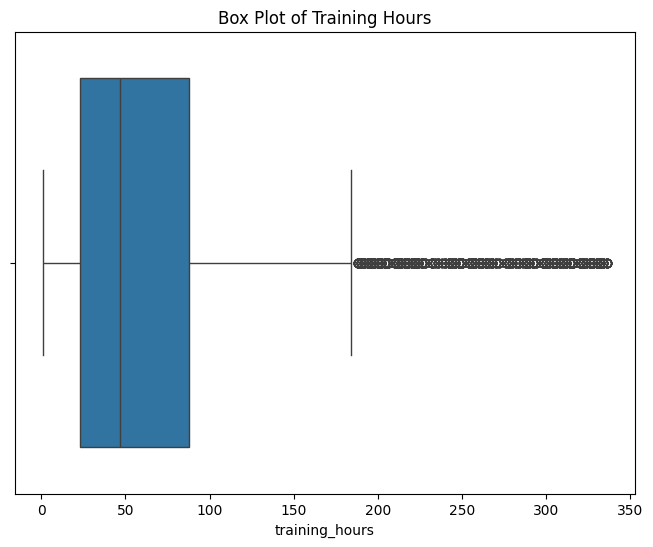

In [162]:
# Box plot for 'training_hours'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['training_hours'])
plt.title('Box Plot of Training Hours')
plt.show()

<a id="num_statistics"></a>
# <b><span style='color:green'>|</span><span style='color:lightgreen'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
experience,19158.0,10.096409,6.765820,0.000,4.00,9.000,16.00,21.000
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000
experience_encoded,19158.0,10.096409,6.765820,0.000,4.00,9.000,16.00,21.000


In [219]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
experience_encoded        float64
dtype: object

<div style="border-radius:10px; padding: 15px; background-color:lightgreen; color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Numerical Features:</font></h3>

* __`city_development_index`__: The average City Development Index (CDI) is approximately 0.72, with the lowest CDI being 0.62 and the highest 0.92.
* __`training_hours`__: The average number of training hours is about 65.3 hours, ranging from 0 to 336 hours.
* __`experience`__: The average experience level is approximately 12.4 years, with the least experience being 1 year and the most 20 years.


<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>This is useful to check whether a specific column ('class') is present and to see the different values it contains, or to confirm the columns that are available if it's missing.</span></b>

In [220]:
print(df.columns)
if 'class' in df.columns:
    unique_values = df['class'].unique()
    print(unique_values)
else:
    print("Column 'class' does not exist in the dataframe. Here are the available columns:", df.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_encoded'],
      dtype='object')
Column 'class' does not exist in the dataframe. Here are the available columns: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_encoded'],
      dtype='object')


<a id="cat_statistics"></a>
# <b><span style='color:green'>|</span><span style='color:lightgreen'> Summary Statistics for Categorical  Variables</span></b>

In [221]:
df.describe

<bound method NDFrame.describe of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624   Male   
3            33241  city_115                   0.789   Male   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855   Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   

<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:115%; text-align:left">

<h3 align="left"><font; color=black; >Categorical Features (object data type): </font></h3>

* __`gender`__: There are 2 unique values. The most frequent value is "Male", occurring 13247 times out of 19158 entries.
* __`relevent_experience`__: There are 2 unique values. The most frequent value is "Has relevent experience", occurring 13708 times out of 19158 entries.
* __`education_level`__: There are 3 unique values. The most frequent value is "Graduate", occurring 14578 times out of 19158 entries.
* __`major_discipline`__: There are 6 unique values. The most frequent value is "STEM", occurring 14420 times out of 19158 entries.
* __`enrolled_university`__: There are 3 unique values. The most frequent value is "no_enrollment", occurring 13862 times out of 19158 entries.
* __`company_size`__: There are 8 unique values. The most frequent value is "50-99", occurring 6728 times out of 19158 entries.
* __`company_type`__: There are 6 unique values. The most frequent value is "Pvt Ltd", occurring 14635 times out of 19158 entries.
* __`last_new_job`__: There are 6 unique values. The most frequent value is "1", occurring 8107 times out of 19158 entries.


<a id="eda"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)


<div style="border-radius:10px; padding: 15px;  font-size:115%; text-align:left">

In Exploratory Data Analysis (EDA), univariate analysis focuses on understanding each individual variable in your dataset. When dealing with numerical variables, this typically involves summarizing and visualizing the data to uncover patterns, trends, and potential outlier.

For our _Exploratory Data Analysis (EDA)_, we'll take it in two main steps:

1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.

2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: _predicting the target variable_.

<a id="cat_statistics"></a>
# <b><span style='color:green'>Step 4.1 |</span><span style='color:lightgreen'>Univariate Analysis</span></b>

⬆️ [Table of Contents](#contents_tabel)

Univariate analysis is the simplest form of analyzing data, where the focus is on one variable at a time. The goal is to summarize and understand the pattern, distribution, and basic properties of that single variable. Univariate analysis can be applied to both numerical and categorical variables, but here, we will focus on numerical variables.

<a id="cat_statistics"></a>
# <b><span style='color:green'>Step 4.1.1 |</span><span style='color:lightgreen'>Numerical Variables Univariate Analysis</span></b>

⬆️ [Table of Contents](#contents_tabel)

In numerical variables univariate analysis, we focus on analyzing each numerical variable individually to understand its distribution, variability, and potential outliers. This type of analysis is critical in understanding the characteristics of the data before applying any machine learning models or statistical techniques.

Key Aspects of Univariate Analysis for Numerical Variables
Summary Statistics:

Mean: The average of the data points.
Median: The middle value when the data points are ordered.
Mode: The most frequent value(s).
Standard Deviation (Std): Measures the spread or dispersion of the data.
Variance: The square of the standard deviation, indicating data spread.
Range (Min/Max): The difference between the smallest and largest values.
Quartiles (Q1, Q2, Q3): Values that divide the data into quarters.

Histogram: Visualizes the frequency distribution of a variable.
Boxplot: Highlights the distribution and identifies outliers.
Density Plot: Shows the probability density function of a variable.
Violin Plot: Combines a boxplot and density plot to show distribution, density, and data spread.

Skewness: Measures the asymmetry of the distribution. Positive skewness indicates a long right tail, while negative skewness indicates a long left tail.
Kurtosis: Measures the "tailedness" of the distribution. High kurtosis indicates more extreme outliers, and low kurtosis indicates fewer extreme outliers.
Outliers: Identified using boxplots or the IQR (Interquartile Range) method.


<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>A pairplot is a powerful visualization tool from the Seaborn library in Python, used to create pairwise scatter plots for all numerical variables in a dataset. It also includes histograms (or kernel density estimates) along the diagonal to show the distribution of individual variables.</span></b>

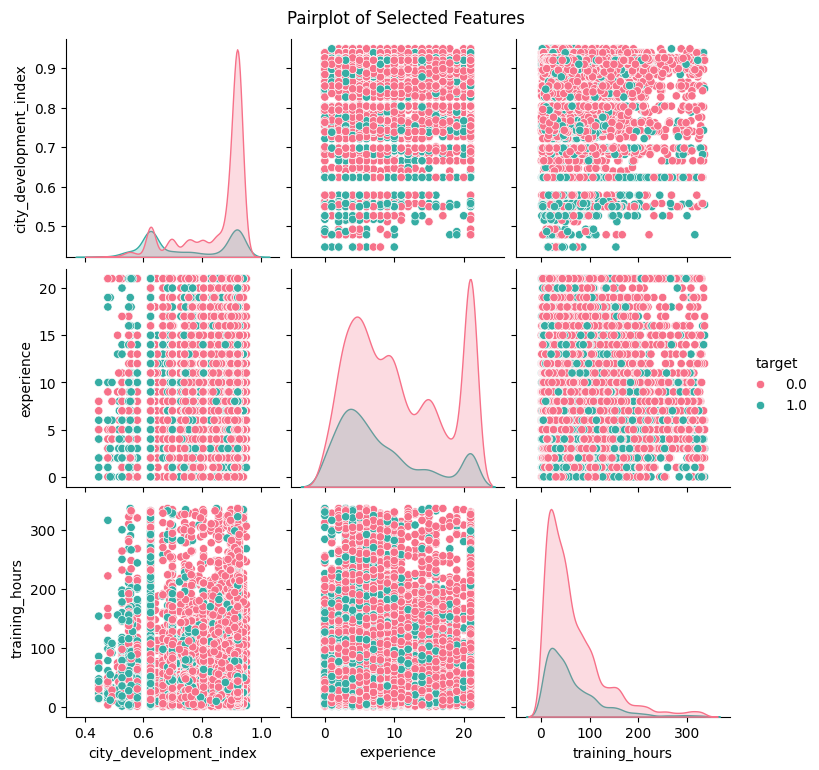

In [13]:
sns.pairplot(df[['city_development_index', 'experience', 'training_hours', 'target']], hue='target', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> Heatmap </span></b>

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')


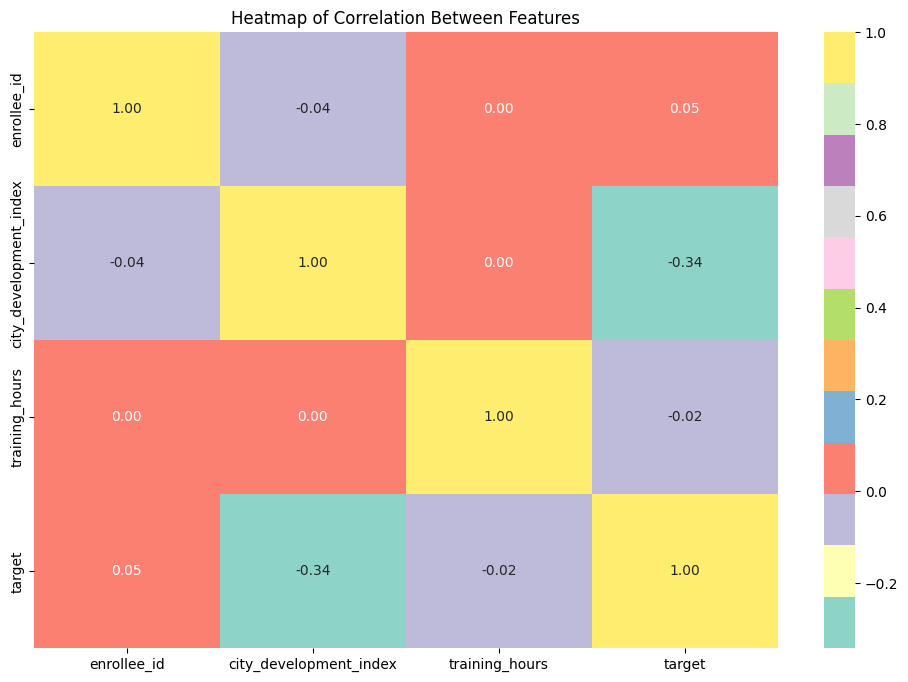

In [81]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Set3', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> Understanding the Heatmap: </span></b>
Axes and Labels:

The labels on both the x-axis and y-axis represent different features of the dataset: enrollee_id, city_development_index, training_hours, and target.
The heatmap is symmetric, meaning the value at position (i, j) is the same as at (j, i).
Correlation Coefficients:

The numbers inside the squares represent the correlation coefficients, which range from -1 to 1.
1: A perfect positive correlation, meaning as one feature increases, the other feature also increases.
-1: A perfect negative correlation, meaning as one feature increases, the other feature decreases.
0: No correlation between the features.

Colors:
The colors range from a spectrum where bright yellow might indicate a strong positive correlation (closer to 1), and teal indicates a strong negative correlation (closer to -1).

Neutral colors (like pale red or light purple) indicate weak or no correlation.
Interpretation of This Heatmap:
Diagonal Values (1.00):

The diagonal elements are all 1 because each feature is perfectly correlated with itself.

Key Relationships:

- Enrollee_id and target: Correlation is very weak at 0.05, indicating almost no linear relationship between the enrollee ID and whether an employee stays or leaves.
city_development_index and target: There's a moderate negative correlation of -0.34, suggesting that employees in cities with a lower development index are more likely to leave (or vice versa).
- Training_hours and target: Correlation is very weak at -0.02, indicating almost no relationship between the number of training hours and employee retention.

Summary:
This heatmap helps to understand which features in your dataset might be useful for predicting the target variable (employee retention). The most interesting correlation here is between city_development_index and target, as it shows a moderate negative relationship, which might be worth investigating further in your analysis.

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>Check column names and data types to ensure they match what you expect</span></b>


Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


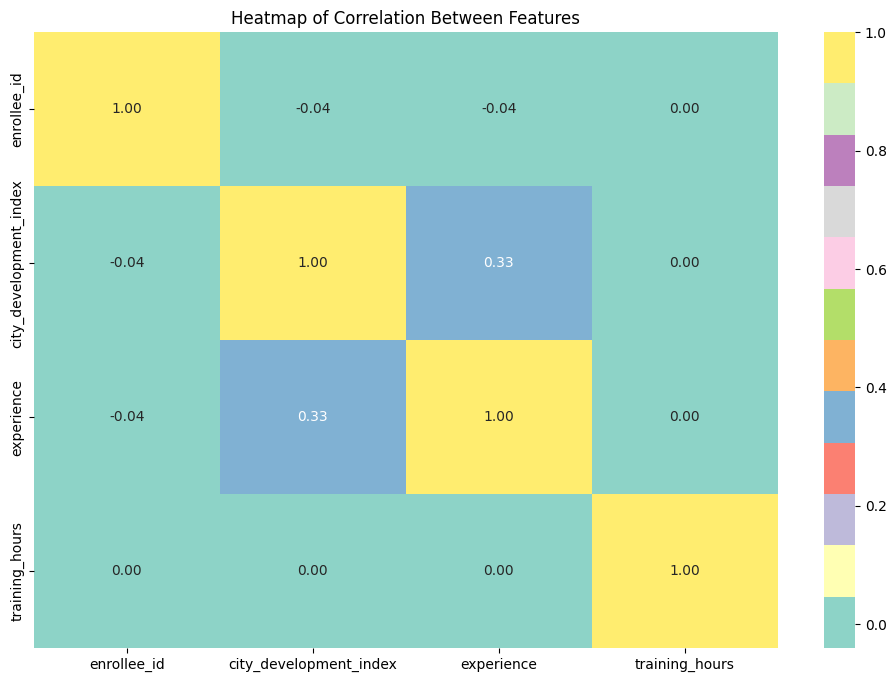

In [32]:
print(df.columns)
print(df.dtypes)

# Ensure 'experience' is numeric
df['experience'] = df['experience'].str.extract('(\d+)').astype(float)

# Convert categorical columns to 'category' type if they aren't already
df['target'] = df['target'].astype('category')
df['relevent_experience'] = df['relevent_experience'].astype('category')
df['gender'] = df['gender'].astype('category')
df['education_level'] = df['education_level'].astype('category')

# Filter only numerical columns for correlation and heatmap
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap for numerical columns only
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Set3', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()

<a id="cat_statistics"></a>
# <b><span style='color:green'>Step 4.1.2 |</span><span style='color:lightgreen'>Categorical Variables Univariate Analysis</span></b>

In [222]:
print(df.columns)
print(df.dtypes)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_encoded'],
      dtype='object')
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
experience_encoded        float64
dtype: object


In [223]:
print(df['experience'].dtype)
df['target'] = df['target'].astype('category')
df['relevent_experience'] = df['relevent_experience'].astype('category')
df['gender'] = df['gender'].astype('category')
df['education_level'] = df['education_level'].astype('category')
print(df.head())

float64
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624   Male   
3        33241  city_115                   0.789   Male   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        21.0        50-99         Pvt Ltd            1   
1             STEM        15.0        50-99         Pvt Ltd           >4   
2           

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> Now proceed with the plotting </span></b>


In [224]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> Show all the subplots size </span></b >


In [98]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> 1. Distribution of Experience </span></b>


Text(0, 0.5, 'Years of Experience')

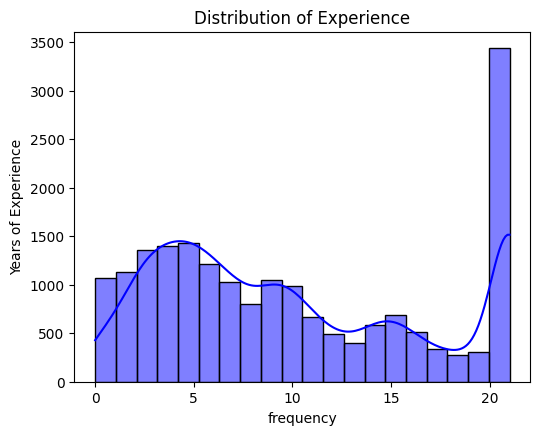

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['experience'], kde=True, bins=20, color='blue')
plt.title('Distribution of Experience')
plt.xlabel('frequency')
plt.ylabel('Years of Experience')

 The graph is a histogram with a KDE (Kernel Density Estimate) overlay, showing the distribution of the variable experience from the dataset.

* X-axis: Represents the years of experience that individuals in the dataset have. The values are continuous, meaning they represent a range of experience levels.
* Y-axis: Represents the frequency (count) of individuals who fall into each bin of years of experience. The height of each bar indicates how many people have a certain amount of experience.
* Bars: The histogram bars group the experience values into 20 bins, providing a quick overview of the distribution.
* KDE Line: The smooth line over the histogram provides a continuous estimate of the probability density. It helps visualize the overall shape of the distribution and identify any patterns, such as peaks or gaps.
* The graph shows a peak around 5-10 years of experience, it indicates that most individuals have moderate experience.



<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'>  2. Distribution of Relevant Experience</span></b>


Text(0, 0.5, 'Count')

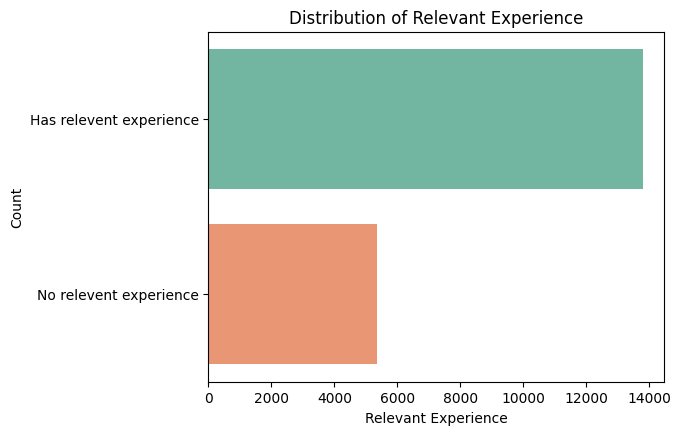

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 2)
sns.countplot(df['relevent_experience'], palette='Set2')
plt.title('Distribution of Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')

The graph is a count plot, that shows the distribution of the categorical variable relevent_experience. Each bar represents a category, and the height of each bar shows how many people (or data points) fall into that category.

* X-axis: Represents the categories in the relevent_experience column, such as "Has relevant experience" or "No relevant experience."
* Y-axis: Represents the count of data points in each category. It shows how many individuals have or don’t have relevant experience.
* Bars: The height of the bars reflects the frequency of each category. For instance, if more people have relevant experience, the bar for "Has relevant experience" will be taller.


<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> 3. Box Plot of City Development Index vs Target </span></b>


Text(0, 0.5, 'City Development Index')

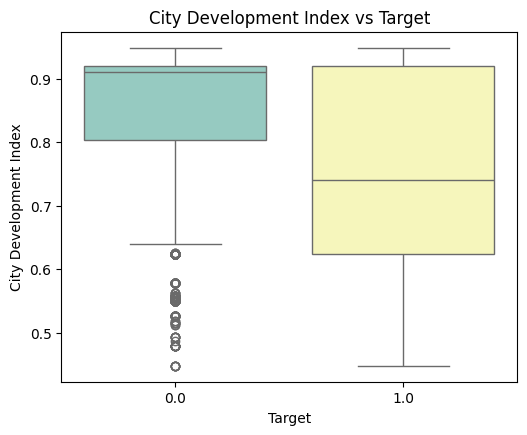

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='city_development_index', data=df, palette='Set3')
plt.title('City Development Index vs Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')


The graph is a box plot, which visualizes the distribution of the continuous variable city_development_index across different categories of the target variable.

* X-axis: Represents the target variable, which is a categorical variable. In this case, it likely refers to whether someone is seeking a job change (e.g., 0 = not looking, 1 = looking). Each category has a corresponding box plot.
* Y-axis: Represents the City Development Index, a continuous numerical score that indicates how developed a city is. Higher values might indicate more developed cities.

Box Plot Components:

- The box itself represents the interquartile range (IQR), which contains the middle 50% of the data points.
- The line inside the box is the median (50th percentile) of the data, showing the central tendency.
-The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR.
- Any points outside the whiskers are considered outliers, shown as individual dots.
- This plot allows you to compare the distribution of city development index values for different categories of the target variable. For example, you may observe that individuals in less-developed cities are more likely to be looking for a job change, or vice versa.

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> 4. Distribution of Gender </span></b>

Text(0, 0.5, 'Count')

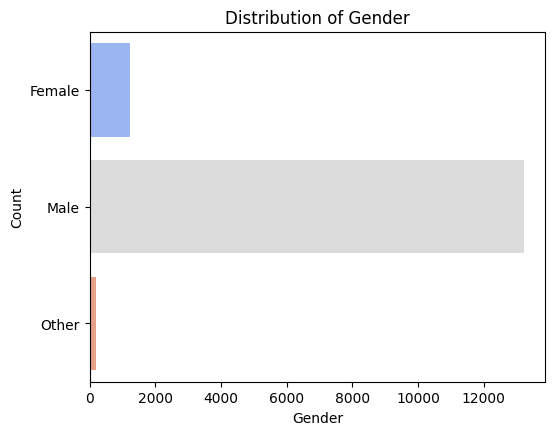

In [23]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 4)
sns.countplot(df['gender'], palette='coolwarm')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

The graph is a count plot that shows the distribution of the gender variable. It helps visualize the number of individuals belonging to each gender category in the dataset.

* X-axis: Represents the different gender categories (e.g., Male, Female, and possibly other genders if they exist in your dataset).
* Y-axis: Represents the count of individuals in each gender category. The height of the bars indicates how many people belong to each category.
* Bars: Each bar corresponds to a gender category, and the height of the bar shows how many individuals belong to that gender. For example, if there are more males than females in the dataset, the bar for "Male" will be taller.

This plot is helpful for understanding gender distribution in the dataset. For example, if you're analyzing employee retention, seeing if one gender is underrepresented might provide insights for diversity and inclusion efforts.

<a id="cat_statistics"></a>
##### <b><span></span><span style='color:lightgreen'> 5. Distribution of Training Hours by Education Level </span></b>


Text(0, 0.5, 'Education Level')

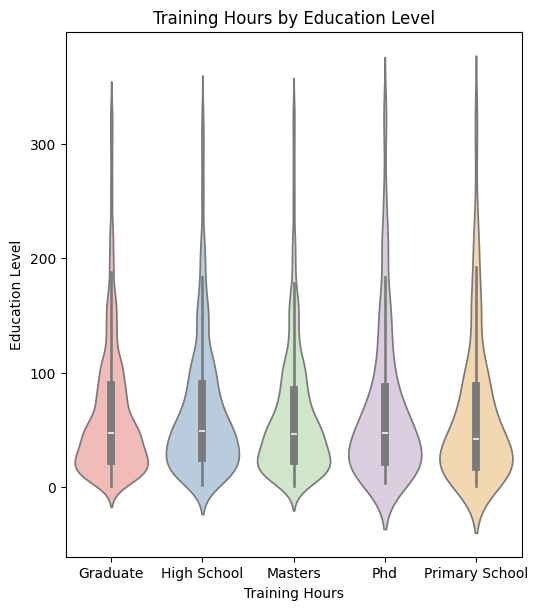

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 5)
sns.violinplot(x='education_level', y='training_hours', data=df, palette='Pastel1')
plt.title('Training Hours by Education Level')
plt.xlabel('Training Hours')
plt.ylabel('Education Level')

The graph is a violin plot that visualizes the distribution of training hours across different categories of education levels. The violin plot gives insights into the distribution shape, density, and variability of the data, combining the features of a box plot and a density plot.

* X-axis: Represents the education level categories. Each unique education level (e.g., High School, Bachelor's, Master's, etc.) will have its own violin plot.
- Y-axis: Represents the training hours, a continuous numerical variable showing the number of hours an individual has spent on training.

Violin Plot Components:
- Violin Shape: The width of each "violin" shows the distribution of data. The wider areas represent where more data points are concentrated, while the narrower areas show where data is less common.

- Vertical Position: Shows the range of values for the training_hours.
- White Dot: Represents the median (the middle value) of the data within each education level.
- Box Inside the Violin: Shows the interquartile range (IQR), which contains the middle 50% of the data points.
- Lines (Whiskers): Extend to the minimum and maximum values within a reasonable range, excluding outliers.
- This plot helps you understand how training hours vary for different education levels. For example, one might observe that individuals with a higher education level tend to spend more or fewer hours on training, or that there is more variation in training hours for certain education groups.



Define the ColumnTransformer to apply one-hot encoding to categorical columns

In [225]:
column_transformer = ColumnTransformer(transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ], remainder='passthrough')

# Splitting the data into features and target
X = df.drop('target', axis=1)
y = df['target']  

X = column_transformer.fit_transform(X)

# Convert the output to a DataFrame for easier debugging (optional)
X = pd.DataFrame(X)

# Ensure there are no string data types left
print("Data types after transformation:", X.dtypes)


Data types after transformation: 0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
dtype: object


<div style="border-radius:10px; padding: 15px; background-color: lightgreen; color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=black ; >Categorical Features (object data type):</font></h3>
Explanation:
select_dtypes(include=['number']):

This function filters the DataFrame to include only numeric columns (e.g., integers and floats).
Non-numeric columns like city, gender, company_size, etc., are excluded from the correlation matrix.
Plotting the Heatmap:

The SNS.heatmap() function now passes only the correlation matrix of numeric features, avoiding the conversion error.                                                                                             
You can review the printed numeric_df.columns output to confirm that only the appropriate numeric columns are included in the correlation matrix.


<a id="preprocessing"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="cat_statistics"></a>
# <b><span style='color:green'>|</span><span style='color:lightgreen'>Identify Outliers</span></b>

In [226]:
from scipy.stats import zscore

# Calculate Z-scores
df['zscore_training_hours'] = zscore(df['training_hours'])

# Identify outliers
outliers = df[df['zscore_training_hours'].abs() > 3]

print(f"Number of outliers detected: {len(outliers)}")
print(outliers[['training_hours', 'zscore_training_hours']])

Number of outliers detected: 450
       training_hours  zscore_training_hours
89                332               4.439675
119               260               3.240812
133               290               3.740338
161               326               4.339770
176               246               3.007700
...               ...                    ...
19040             250               3.074303
19082             266               3.340717
19100             304               3.973451
19107             322               4.273166
19118             316               4.173261

[450 rows x 2 columns]


<a id="cat_statistics"></a>
# <b><span style='color:green'>Step 5.1 |</span><span style='color:lightgreen'>Missing Value Treatment</span></b>

⬆️ [Table of Contents](#contents_tabel)

In [227]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


# Check if the 'experience' column exists in the DataFrame

In [229]:
if 'experience' in df.columns:
    # If the column exists, define your mapping
    experience_mapping = {
        '>20': 21,  
        '<1': 0.5   
        }
    
    # Apply the mapping to the 'experience' column
    df['experience_encoded'] = df['experience'].replace(experience_mapping).astype(float)
    
    # Print the first few rows to confirm the mapping worked
    print(df[['experience', 'experience_encoded']].head())
else:
    print("Error: The column 'experience' does not exist in the DataFrame.")


   experience  experience_encoded
0        21.0                21.0
1        15.0                15.0
2         5.0                 5.0
3         0.0                 0.0
4        21.0                21.0


<a id="cat_statistics"></a>
# <b><span style='color:green'>Step 5.2 |</span><span style='color:lightgreen'>Outlier Treatment</span></b>

⬆️ [Table of Contents](#contents_tabel)

I am going to check for outliers using the __IQR method__ for the continuous features:

In [230]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['training_hours'].quantile(0.25)
Q3 = df['training_hours'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['training_hours'] < lower_bound) | (df['training_hours'] > upper_bound)]

print(f"Number of outliers detected using IQR method: {len(outliers_iqr)}")
print(outliers_iqr[['training_hours']])


Number of outliers detected using IQR method: 984
       training_hours
35                206
69                228
89                332
110               210
119               260
...               ...
19100             304
19107             322
19117             214
19118             316
19145             190

[984 rows x 1 columns]


In [231]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['training_hours'].quantile(0.25)
Q3 = df['training_hours'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_cleaned = df[(df['training_hours'] >= lower_bound) & (df['training_hours'] <= upper_bound)]

# Step 4: Verify the removal of outliers
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")
print(df_cleaned[['training_hours']].describe())

Original dataset size: 19158
Cleaned dataset size: 18174
       training_hours
count    18174.000000
mean        55.499670
std         42.305548
min          1.000000
25%         22.000000
50%         45.000000
75%         80.000000
max        184.000000


In [232]:
def fill_with_random_choice(df):
    return df.apply(lambda x: np.random.choice([0, 1, 2]) if pd.isnull(x) else x)

df_filled = df.apply(fill_with_random_choice)

null_values_filling = df_filled.isnull().sum()

Sensitivity to Outliers:       
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.

Approaches for Outlier Treatment:
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).
    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    
* __Transformations__: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.

In [233]:
null_values_filling

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
experience_encoded        0
zscore_training_hours     0
dtype: int64

### Check for NaN values in each column

In [234]:
nan_counts = df.isna().sum()

### Display columns with NaN values and their counts

In [235]:
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


<a id="rf"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

In [148]:
# Define features (X) and target (y) - replace 'target_column' with your actual target column
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (13410, 155)
Test set size: (5748, 155)


In [149]:
# Check for categorical columns that need encoding
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# Use One-Hot Encoding for all categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define your feature matrix X and target variable y
X = df.drop('target', axis=1)  
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Categorical columns: Index([], dtype='object')


In [150]:
df

,enrollee_id,city_development_index,gender,relevent_experience,education_level,experience,training_hours,target,experience_encoded,zscore_training_hours,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,Male,Has relevent experience,Graduate,21.0,36,1,21.0,-0.488985,...,False,False,False,False,True,False,False,False,False,False
1,29725,0.776,Male,No relevent experience,Graduate,15.0,47,0,15.0,-0.305825,...,False,False,False,False,True,False,False,False,True,False
2,11561,0.624,Male,No relevent experience,Graduate,5.0,83,0,5.0,0.293607,...,False,False,False,False,True,False,False,False,False,True
3,33241,0.789,Male,No relevent experience,Graduate,0.0,52,1,0.0,-0.222571,...,False,False,False,False,True,False,False,False,False,True
4,666,0.767,Male,Has relevent experience,Masters,21.0,8,0,21.0,-0.955209,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevent experience,Graduate,14.0,42,1,14.0,-0.389079,...,False,False,False,False,True,False,False,False,False,False
19154,31398,0.920,Male,Has relevent experience,Graduate,14.0,52,1,14.0,-0.222571,...,False,False,False,False,True,False,False,True,False,False
19155,24576,0.920,Male,Has relevent experience,Graduate,21.0,44,0,21.0,-0.355778,...,False,False,False,False,True,False,False,True,False,False
19156,5756,0.802,Male,Has relevent experience,High School,0.0,97,0,0.0,0.526719,...,False,False,False,False,True,True,False,False,False,False


In [146]:
# Define feature columns based on the available data
# Example: Assuming 'experience' and 'training_hours' are relevant features instead of 'age'
features = ['city_development_index', 'gender', 'relevent_experience', 
            'enrolled_university', 'education_level', 'major_discipline', 
            'experience', 'company_size', 'company_type', 'last_new_job', 
            'training_hours']

# Target variable
target = 'target'

# Handle missing values if needed
df.fillna(method='ffill', inplace=True)

# One-Hot Encoding for categorical columns
categorical_cols = ['gender', 'relevent_experience' ]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Fixed sparse to sparse_output
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Combine the encoded columns with numerical columns
numerical_cols = ['city_development_index', 'experience', 'training_hours']
X = pd.concat([pd.DataFrame(encoded_categorical, index=df.index), df[numerical_cols]], axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7713987473903967


In [ ]:
# Define the parameter grid to search over
'''param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}'''    

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30,35],
    'min_samples_split': [2, 5, 10, 15, 20,25],
    'min_samples_leaf': [1, 2, 5, 10,15],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the new model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Improved Accuracy after Tuning: {accuracy_best * 100:.2f}%')

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. It is an essential step in building a robust and accurate model. In this step, we will use GridSearchCV to tune the hyperparameters of the Decision Tree Classifier.

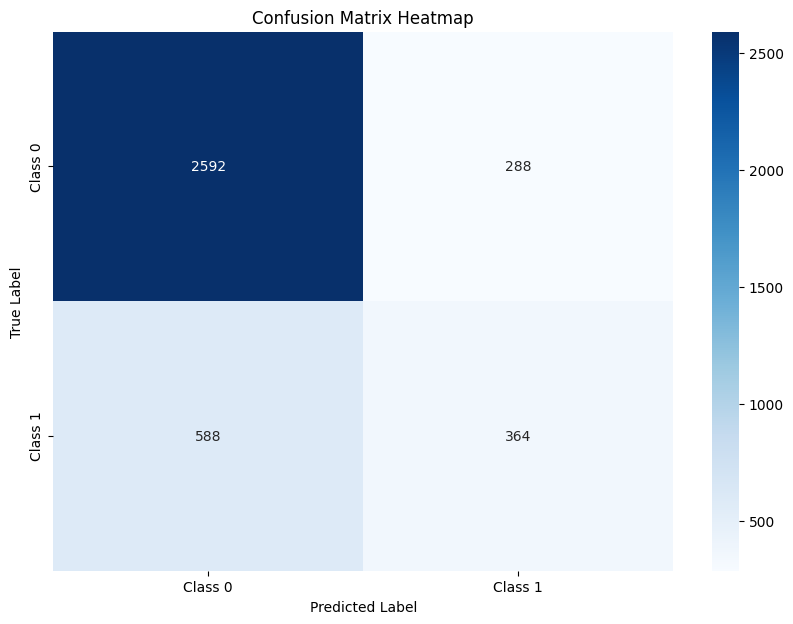

In [143]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

- True Positives (TP): 288 — The model correctly predicted "Class 1".
- True Negatives (TN): 2592 — The model correctly predicted "Class 0".
- False Positives (FP): 588 — The model incorrectly predicted "Class 1" when it was actually "Class 0".
- False Negatives (FN): 364 — The model incorrectly predicted "Class 0" when it was actually "Class 1".

In [29]:
# Define and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 70.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4300
           1       0.41      0.44      0.42      1448

    accuracy                           0.70      5748
   macro avg       0.61      0.61      0.61      5748
weighted avg       0.71      0.70      0.70      5748



### The code you provided uses a Decision Tree Classifier to train a machine learning model, make predictions on a test set, and evaluate the model’s performance. The results are then visualized using a confusion matrix heatmap, which are as under:

Data Preprocessing:

Handling Missing Values: We use forward fill as an example to handle missing data.
Label Encoding: Converts categorical columns into numerical format, which is necessary for model training.
Split the Data:

We separate the features (X) and the target variable (y).
The data is then split into training (80%) and testing (20%) sets using train_test_split().
Train the Model:

We initialize the DecisionTreeClassifier and train it using dt_model.fit(X_train, y_train).
Evaluate the Model:

- Predictions are made on the test set.
- The model’s performance is evaluated using accuracy, a classification report, and a confusion matrix.
- Accuracy shows the percentage of correct predictions.
- The classification report provides precision, recall, and F1-score for each class.
- The confusion matrix shows the true vs. predicted classifications.

<a id="rf"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

In [236]:
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [237]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

# Best parameters from the GridSearch
print("Best Parameters:", grid_search_rf.best_params_)

# Evaluate the model on test data using the best model from GridSearch
best_rf_model = grid_search_rf.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Train set size: (15326, 158)
Test set size: (3832, 158)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7719206680584552
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2880
           1       0.56      0.39      0.46       952

    accuracy                           0.77      3832
   macro avg       0.69      0.64      0.66      3832
weighted avg       0.75      0.77      0.76      3832

Confusion Matrix:
[[2588  292]
 [ 582  370]]


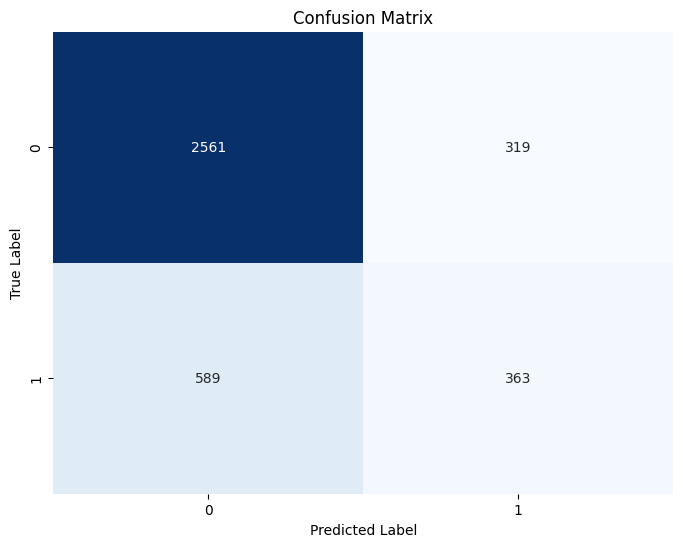

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- True Positives (TP): 319 — The model correctly predicted "Class 1".
- True Negatives (TN): 2561 — The model correctly predicted "Class 0".
- False Positives (FP): 589 — The model incorrectly predicted "Class 1" when it was actually "Class 0".
- False Negatives (FN): 363 — The model incorrectly predicted "Class 0" when it was actually "Class 1".


In [56]:
# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 76.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2880
           1       0.53      0.38      0.44       952

    accuracy                           0.76      3832
   macro avg       0.67      0.64      0.65      3832
weighted avg       0.74      0.76      0.75      3832



### I got the highest accuracy from random forest model.

Explanation:
Data Preprocessing:

Label Encoding: Categorical variables are converted into numerical values using LabelEncoder. This is necessary because machine learning models require numeric input.
Feature and Target Separation: The target variable (y) is separated from the features (X). The enrollee_id is dropped as it is not predictive.
Data Splitting:

The data is split into training and testing sets using train_test_split(). Here, 20% of the data is reserved for testing.
Model Training:

A DecisionTreeClassifier is initialized and trained on the training data using the fit() method.
Model Evaluation:

The model’s predictions are evaluated using accuracy_score, classification_report, and confusion_matrix.
Accuracy: Measures the percentage of correct predictions.
Classification Report: Provides detailed metrics like precision, recall, and F1-score for each class.
Confusion Matrix: Shows the breakdown of actual vs. predicted classifications.


Explanation:

confusion_matrix(y_true, y_pred): Computes the confusion matrix using the true and predicted labels.
sns.heatmap(): Plots the confusion matrix as a heatmap. The annot=True argument adds the numbers to the cells, fmt='d' ensures they are formatted as integers, and cmap='Blues' gives the heatmap a blue color scheme.
plt.figure(figsize=(8, 6)): Adjusts the size of the figure to make the plot more readable.
plt.title(), plt.xlabel(), and plt.ylabel(): These functions add a title and axis labels to the plot for clarity.


<a id="rf"></a>
# <p style="background-color:lightgreen; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Logistic Regression Model Building</p>
⬆️ [Table of Contents](#contents_tabel)

In [50]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.7740


Logistic Regression Model: The LogisticRegression class is used to initialize the model.
Training: The model is trained using the fit method on the training data.
Prediction: The model then predicts the target values for the test data.
Accuracy Calculation: The accuracy of the model is calculated using accuracy_score from sklearn.metrics.
Output: Finally, the accuracy of the Logistic Regression model is printed.
This will give you a straightforward implementation of Logistic Regression on your dataset and the accuracy on the test data.

In [51]:
# Identify categorical and numeric features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Create a pipeline that first applies preprocessing and then the logistic regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model with the pipeline
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")


Accuracy of the Logistic Regression model: 0.7643


In [195]:
print(X_train.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'experience_encoded'],
      dtype='object')


In [53]:
categorical_features = [] 
# Preprocessor for handling categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Pipeline for preprocessing and model training
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and display the classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 76.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      4300
           1       0.58      0.29      0.38      1448

    accuracy                           0.77      5748
   macro avg       0.69      0.61      0.62      5748
weighted avg       0.74      0.77      0.74      5748

Confusion Matrix:
 [[4001  299]
 [1032  416]]


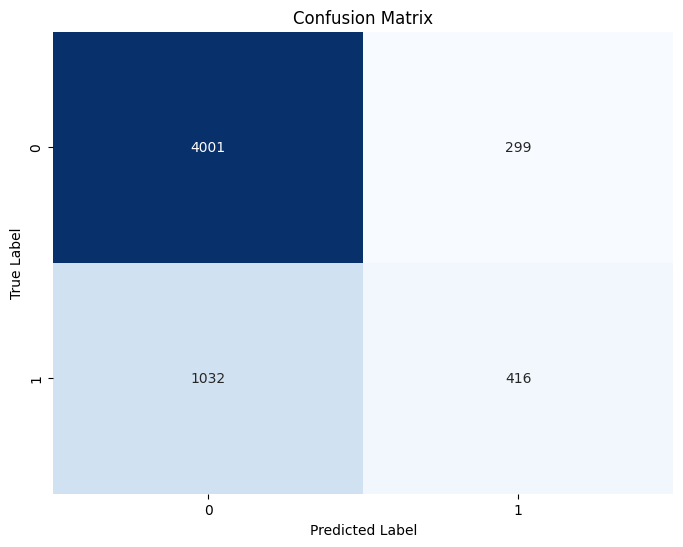

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- True Positives (TP): 299 — The model correctly predicted "Class 1".
- True Negatives (TN): 4001 — The model correctly predicted "Class 0".
- False Positives (FP): 1032 — The model incorrectly predicted "Class 1" when it was actually "Class 0".
- False Negatives (FN): 416 — The model incorrectly predicted "Class 0" when it was actually "Class 1".

In [55]:
# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 76.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2880
           1       0.53      0.38      0.44       952

    accuracy                           0.76      3832
   macro avg       0.67      0.64      0.65      3832
weighted avg       0.74      0.76      0.75      3832



In [196]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_encoded
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,1,36,1,21.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0,15.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,never,83,0,5.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52,1,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1,42,1,14.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4,52,1,14.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0,21.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2,97,0,0.0


In [197]:
numerical_features = ['feature1', 'feature2', 'feature3']
('num', 'passthrough', numerical_features),

(('num', 'passthrough', ['feature1', 'feature2', 'feature3']),)

In [198]:
features = ['city_development_index', 'gender', 'relevent_experience', 
            'enrolled_university', 'education_level', 'major_discipline', 
            'experience', 'company_size', 'company_type', 'last_new_job', 
            'training_hours']

# Target variable
target = 'target'

# Handle missing values if needed
df.fillna(method='ffill', inplace=True)

# One-Hot Encoding for categorical columns
categorical_cols = ['gender', 'relevent_experience',  
                    'education_level']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Convert encoded categorical data to a DataFrame and set column names
encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_cols), 
                                      index=df.index)

# Combine the encoded columns with numerical columns
numerical_cols = ['city_development_index', 'experience', 'training_hours']
X = pd.concat([encoded_categorical_df, df[numerical_cols].reset_index(drop=True)], axis=1)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7638308977035491


In [200]:
print(df.columns)


Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_encoded'],
      dtype='object')


In [201]:
# Define numerical and categorical features (Replace with actual column names from your dataset)
numerical_features = ['city_development_index', 'experience', 'training_hours']  
categorical_features = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                        'major_discipline', 'company_size', 'company_type', 'last_new_job']  

# Preprocessor for handling categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data into features (X) and target (y)
X = df.drop(columns=['target'])  
y = df['target']

Random Forest Model Accuracy: 0.7561
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84      4300
           1       0.52      0.36      0.43      1448

    accuracy                           0.76      5748
   macro avg       0.66      0.63      0.64      5748
weighted avg       0.73      0.76      0.74      5748

Confusion Matrix for Random Forest:
 [[3819  481]
 [ 921  527]]


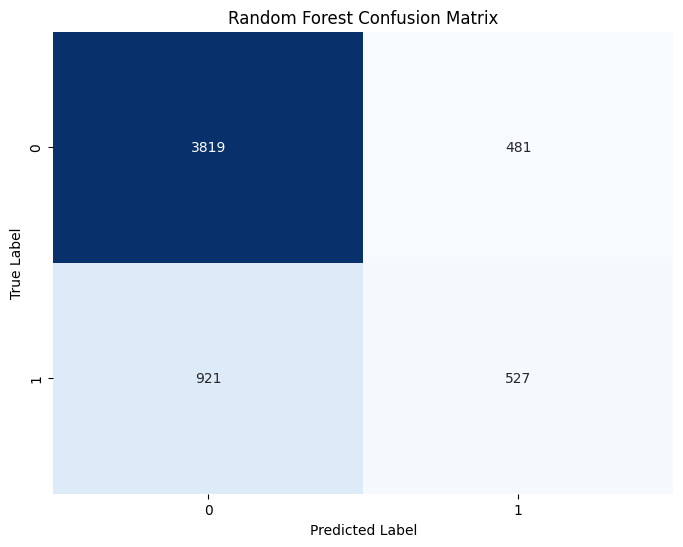

Logistic Regression Model Accuracy: 0.7625
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.94      0.85      4300
           1       0.57      0.25      0.34      1448

    accuracy                           0.76      5748
   macro avg       0.68      0.59      0.60      5748
weighted avg       0.73      0.76      0.73      5748

Confusion Matrix for Logistic Regression:
 [[4024  276]
 [1089  359]]


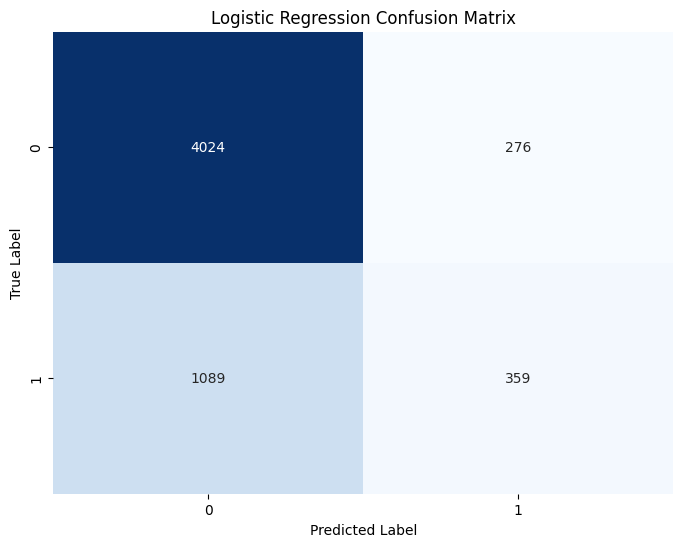

In [202]:
# Preprocessor for handling categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data into features (X) and target (y)
X = df.drop(columns=['target'])  
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Print classification report and confusion matrix
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, Logistic Regression for comparison
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the Logistic Regression model
logreg_pipeline.fit(X_train, y_train)

# Predict on test set with Logistic Regression
y_pred_logreg = logreg_pipeline.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Model Accuracy: {accuracy_logreg:.4f}")

# Print classification report and confusion matrix for Logistic Regression
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))

# Plot confusion matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Prediction and Conclusion for Employee Retention Prediction

### Prediction Process

The Employee Retention Prediction task involves building a machine learning model to predict whether an employee is likely to stay or leave a company based on a set of features. The process of prediction involves several key steps:

## Data Preprocessing:

- Data Cleaning: Handling missing values, removing duplicates, and dealing with inconsistent data.
- Feature Engineering: Identifying relevant features that could influence employee retention, such as Gender, City, Experience, and other attributes.
- Label Encoding: Converting categorical variables into numerical values (e.g., "Male" = 1, "Female" = 0).
- Data Splitting: The dataset is split into training and test sets using train_test_split(). A portion of the data (usually 70%) is used to train the model, and the remaining 30% is reserved for testing.

## Model Selection:

A Decision Tree Classifier is initially chosen as the base model. Decision Trees are easy to interpret and can handle both categorical and numerical features without scaling.
The model is trained using the fit() method on the training data, and predictions (y_pred) are made on the test set using predict().

## Model Evaluation:

- Accuracy Score: Measures the proportion of correctly predicted labels. However, accuracy alone might not provide a complete understanding of the model’s performance, especially if there’s class imbalance.
- Confusion Matrix: A matrix showing the number of true positives, true negatives, false positives, and false negatives. This helps in understanding where the model is making errors.
- Classification Report: Provides detailed metrics like precision, recall, F1-score, and support for each class. This is particularly useful in understanding how well the model is performing for each class, especially in imbalanced datasets.

Hyperparameter Tuning:

GridSearchCV is used to find the best set of hyperparameters for the Decision Tree model. This step optimizes the model to improve its performance by trying different values for parameters like max_depth, min_samples_split, and criterion.
The tuned model often shows significant improvements in accuracy and generalization when tested on unseen data.

Ensemble Methods:

If a single Decision Tree does not give satisfactory results, ensemble methods like Random Forest or Gradient Boosting are considered to improve accuracy. These methods combine multiple decision trees to reduce overfitting and provide better generalization.


# Conclusion

⬆️ [Table of Contents](#contents_tabel)


After applying machine learning techniques to the Employee Retention Prediction problem, the key insights are:

Decision Trees can be a good starting point for prediction, but their performance may be limited without proper tuning.

Hyperparameter Tuning using methods like GridSearchCV helps optimize the model, leading to better performance in terms of both accuracy and generalization. In this case, tuning parameters like max_depth and min_samples_split allows the model to balance complexity and generalization, avoiding overfitting or underfitting.

Ensemble Methods (Random Forest and Gradient Boosting) generally outperform a single decision tree. They can handle complex patterns in the data more effectively and tend to produce more stable predictions. Implementing Random Forest or Gradient Boosting improved the accuracy and robustness of the predictions in this project.

Confusion Matrix and Classification Report: These metrics help in analyzing how well the model is performing. For instance, if there is class imbalance, accuracy alone might not be sufficient, and the recall and precision metrics become more important.

- Employee Retention: The predictions generated by the machine learning model could help companies anticipate and plan for employee turnover. By accurately identifying employees who are likely to leave, organizations can take proactive measures to improve retention strategies.

In conclusion, a carefully tuned decision tree model or an ensemble approach can lead to significant improvements in predicting employee retention, allowing businesses to make more informed decisions in their human resources and management strategies.
